In [23]:
import investpy
from datetime import datetime
import pandas as pd
from prompt_toolkit import prompt
import csv
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
from_date = input('Start date (DD/MM/YYYY): ')

Start date (DD/MM/YYYY): 01/01/2020


In [25]:
to_date = input('End date (DD/MM/YYYY): ')

End date (DD/MM/YYYY): 18/12/2020


In [38]:
stock = input('Symbol: ')

Symbol: AGQ


In [39]:
df = investpy.get_stock_historical_data(stock=stock, country='United States', from_date=from_date, 
     to_date=to_date)

RuntimeError: ERR#0018: stock agq not found, check if it is correct.

In [30]:
btc = investpy.get_crypto_historical_data(crypto='bitcoin', from_date=from_date, to_date=to_date)

In [31]:
df.reset_index(inplace = True)
print(df.head())

        Date   Open   High    Low  Close     Volume Currency
0 2020-01-02  74.06  75.15  73.80  75.09  135647456      USD
1 2020-01-03  74.29  75.14  74.12  74.36  146535520      USD
2 2020-01-06  73.45  74.99  73.19  74.95  118578576      USD
3 2020-01-07  74.96  75.22  74.37  74.60  111510624      USD
4 2020-01-08  74.29  76.11  74.29  75.80  132363784      USD


In [32]:
btc.reset_index(inplace = True)
print(btc.head())

        Date    Open    High     Low   Close  Volume Currency
0 2020-01-01  7196.4  7259.4  7180.0  7199.8  420278      USD
1 2020-01-02  7199.7  7209.6  6901.4  6967.0  632778      USD
2 2020-01-03  6967.1  7402.9  6884.1  7343.1  936288      USD
3 2020-01-04  7345.1  7433.1  7291.4  7376.8  523909      USD
4 2020-01-05  7376.8  7501.0  7345.6  7372.5  628142      USD


In [33]:
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,2020-01-02,75.09
1,2020-01-03,74.36
2,2020-01-06,74.95
3,2020-01-07,74.60
4,2020-01-08,75.80


In [34]:
btc = btc[['Date', 'Close']]
btc.head()

,Date,Close
0,2020-01-01,7199.8
1,2020-01-02,6967.0
2,2020-01-03,7343.1
3,2020-01-04,7376.8
4,2020-01-05,7372.5


In [35]:
all = df.merge(btc, on='Date', how='left')
all.head()

,Date,Close_x,Close_y
0,2020-01-02,75.09,6967.0
1,2020-01-03,74.36,7343.1
2,2020-01-06,74.95,7759.1
3,2020-01-07,74.60,8155.7
4,2020-01-08,75.80,8059.6


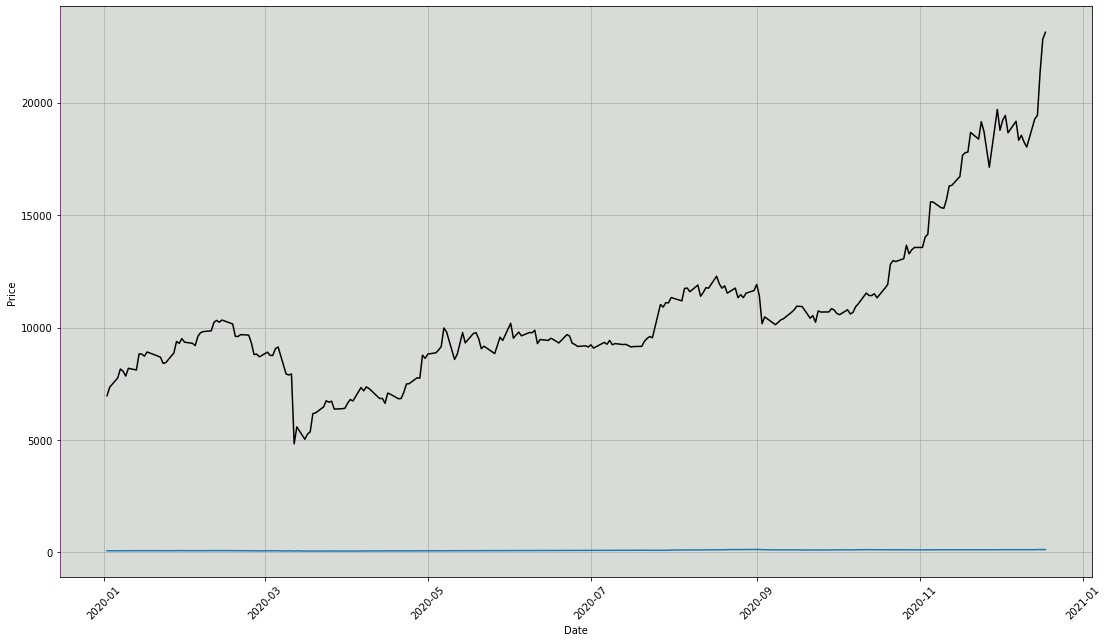

In [36]:
fig, ax = plt.subplots()
ax.plot(all['Date'], all[['Close_x', 'Close_y']])
ax.set_ylabel('Price')
ax.set_xlabel('Date')
# ax.set_title('Bitcoin')
plt.xticks(rotation=45)
# plt.text(x=1970, y=400, s=r'Stock Price at this interval')
# ax.properties()['children'][0].set_color('black')
ax.properties()['children'][1].set_color('black')
ax.properties()['children'][2].set_color('purple')
fig.set_size_inches(18.5, 10.5)
plt.grid()
# ax.legend(['Close', '50d', '200d'], loc='upper left')
ax.set_facecolor('xkcd:light grey')
# graphPath = 'data/stocks'
# graphName = input('Save graph as: ') + '.png'
# graphFileName = os.path.join(graphPath, graphName)
# plt.savefig(graphFileName)

Text(0.5, 0, 'Date')

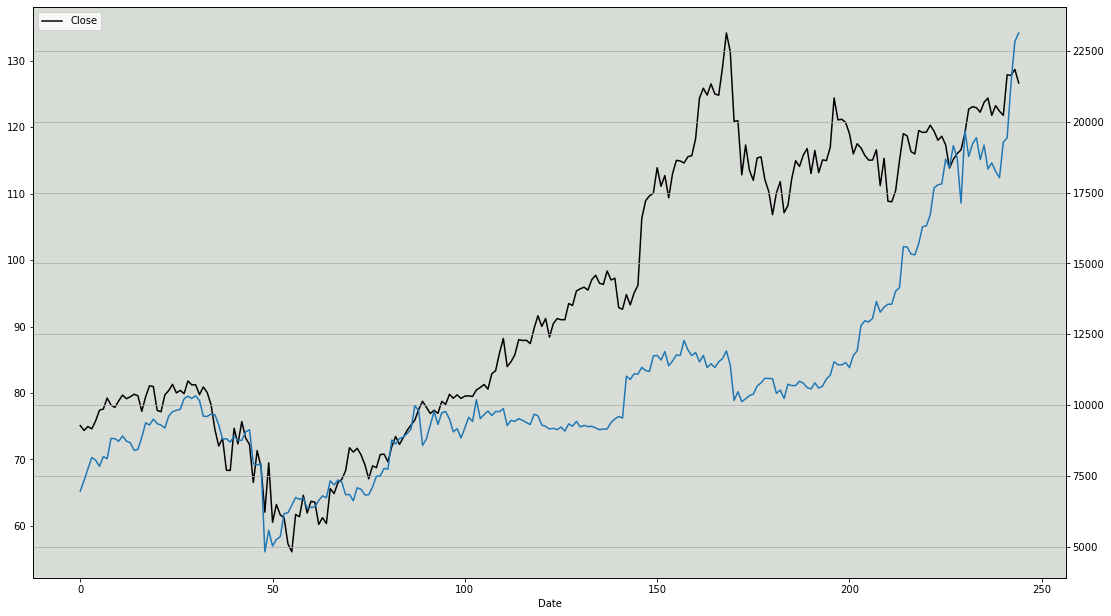

In [55]:
fig, ax = plt.subplots()
# ax3 = ax.twinx()
# rspine = ax3.spines['right']
# rspine.set_position(('axes', 1.15))
# ax3.set_frame_on(True)
# ax3.patch.set_visible(False)
# fig.subplots_adjust(right=0.7)
fig.set_size_inches(18.5, 10.5)
all.Close_x.plot(ax=ax, color='black')
# same ax as above since it's automatically added on the right
all.Close_y.plot(ax=ax, secondary_y=True)
plt.grid()
ax.legend(['Close', '50d', '200d'], loc='upper left')
ax.set_facecolor('xkcd:light grey')
ax.set_xlabel('Date')
# add legend --> take advantage of pandas providing us access
# to the line associated with the right part of the axis
# ax3.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0], ax3.get_lines()[0]],\
#            ['A','B'], bbox_to_anchor=(1.5, 0.5))